In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint


path_to_dataset = 'CK+48'
LABELS = os.listdir(path_to_dataset)
checkpoint_ = 'checkpoint__/model__'

In [2]:
imgarr = [] # [image_pixel, label]
emoarr = []
for i in LABELS:
    img = os.listdir(path_to_dataset+'/'+i)
    for _ in img:
        imgarr.append(plt.imread(path_to_dataset+'/'+i+"/" +_))
        emoarr.append(i)

In [3]:
imgarr= np.array(imgarr)/ 255.0
emoarr = np.array(emoarr)

In [4]:
imgarr.shape,emoarr.shape

((981, 48, 48), (981,))

Text(0.5, 0, 'anger')

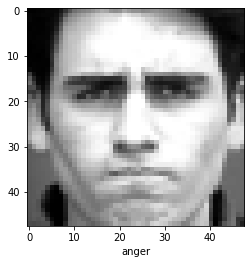

In [5]:
plt.imshow(imgarr[89],cmap= "gray")
plt.xlabel(emoarr[89])


    Labelization:
        'anger' => 0
        'contempt' => 1
        'happy' => 2
        ...
        
    One Hot Encoding:
        Max: 6
        [2] => [0, 0, 1, 0, 0, 0]
        [5] => [0, 0, 0, 0, 0, 1]
        [3] => [0, 0, 0, 1, 0, 0]
        [0] => [1, 0, 0, 0, 0, 0]

In [6]:
#onehotencoding
labdir= {
     0:'anger',
     1: 'contempt',
     2: 'disgust',
     3: 'fear',
     4:'happy',
     5: 'sadness',
     6:'surprise'
}

def one_hot_encode(data):
    new_data = []
    for i in data:
        d = [0 for _ in range(len(LABELS))]
        d[LABELS.index(i)] = 1
        new_data.append(d)
    return np.array(new_data)

dataY = np.apply_along_axis(one_hot_encode, 0, emoarr)
dataX = np.array(imgarr)
dataX = dataX.reshape(-1, 48, 48, 1)

In [7]:
dataY.shape,dataX.shape

((981, 7), (981, 48, 48, 1))

(735, 48, 48, 1) (735, 7) (246, 48, 48, 1) (246, 7)


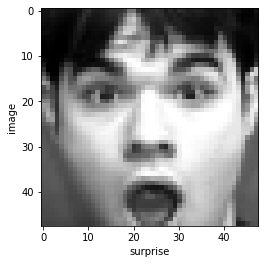

In [8]:
trainX, testX, trainY, testY = train_test_split(dataX, dataY, random_state=71)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
plt.imshow(trainX[0], cmap='gray')
plt.xlabel(LABELS[np.argmax(trainY[0])])
plt.ylabel("image")
plt.show()

In [9]:
# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), input_shape=(48, 48, 1), activation='elu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((3,3)),
#     layers.Dropout(0.3),
    
#     layers.Conv2D(128, (3, 3), activation='elu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((3,3)),
#     layers.Dropout(0.3),
    
#     layers.Conv2D(128, (3, 3t), activation='elu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((3,3)),
#     layers.Dropout(0.3),
    
#     layers.Flatten(),
#     layers.Dense(128, activation='elu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(len(LABELS), activation='softmax')
# ])

# input_shape=(48,48,3)

# model = Sequential()
# model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation = 'softmax'))
input_shape=(48,48,1)

model = models.Sequential([
    layers.Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(16, (5, 5), padding='same', activation = 'relu'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.load_weights(checkpoint_)
# checkpoint_callback = ModelCheckpoint(
#     checkpoint_,
#     monitor="accuracy",
#     save_best_only=True,
#     save_weights_only=True,
#     mode="max",
# )
# import tensorflow as tf
# testX = tf.stack(testX)
# testY=tf.stack(testY)


# trainX = tf.stack(trainX)
# trainY= tf.stack(trainY)
# N_EPOCHS = 50
# trainX = trainX.reshape(-1, 48, 48, 3)
# hist = model.fit(trainX, trainY, epochs=N_EPOCHS, callbacks=[checkpoint_callback])

In [11]:
# # model.load_weights(checkpoint)
# checkpoint_callback = ModelCheckpoint(
#     checkpoint_,
#     verbose=1,
#     monitor="val_accuracy",
#     save_freq='epoch',
#     save_best_only=True,
#     save_weights_only=False,
#     mode="max",
# )

In [14]:
import tensorflow as tf

import os
try:
    os.mkdir('checkpoint_5')
except:
    pass
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint_5',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, #use to do not save the all the moddel
                                                 save_weights_only=True,  #use to complete save the model
                                                 mode='max') #to max the validation

In [15]:
# import tensorflow as tf
# testX = tf.stack(testX)
# testY=tf.stack(testY)


# trainX = tf.stack(trainX)
# trainY= tf.stack(trainY)
# N_EPOCHS = 10
# trainX = trainX.reshape(-1, 48, 48, 3)a=basemodel.fit(xtrain,ytrain,epochs=10,validation_split=.1,callbacks=call_back)
hist=model.fit(trainX,trainY,epochs=10,validation_split=.1,callbacks=call_back)


Epoch 1/10
21/21 [==============================] - 1s 41ms/step - loss: 0.2227 - accuracy: 0.9470 - val_loss: 1.2445 - val_accuracy: 0.7297

Epoch 00001: accuracy improved from -inf to 0.94705, saving model to checkpoint_5\best_model.h5
Epoch 2/10
21/21 [==============================] - 1s 48ms/step - loss: 0.1811 - accuracy: 0.9501 - val_loss: 1.4245 - val_accuracy: 0.5000

Epoch 00002: accuracy improved from 0.94705 to 0.95008, saving model to checkpoint_5\best_model.h5
Epoch 3/10
21/21 [==============================] - 1s 44ms/step - loss: 0.1776 - accuracy: 0.9410 - val_loss: 0.9471 - val_accuracy: 0.8784

Epoch 00003: accuracy did not improve from 0.95008
Epoch 4/10
21/21 [==============================] - 1s 47ms/step - loss: 0.1434 - accuracy: 0.9561 - val_loss: 1.2699 - val_accuracy: 0.6351

Epoch 00004: accuracy improved from 0.95008 to 0.95613, saving model to checkpoint_5\best_model.h5
Epoch 5/10
21/21 [==============================] - 1s 49ms/step - loss: 0.1298 - accur

In [16]:
history = hist.history
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


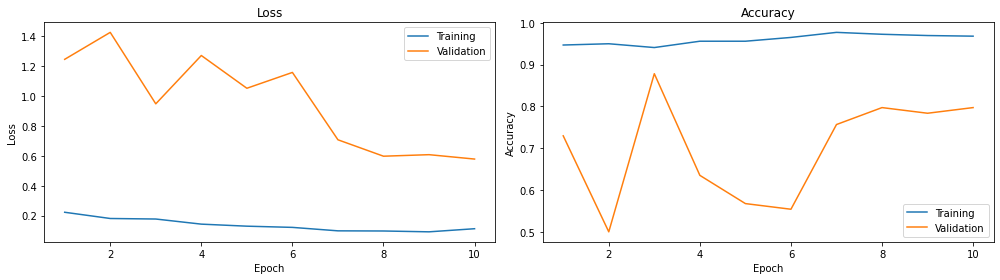

In [17]:
epoch_range = range(1, len(history['loss'])+1)
plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


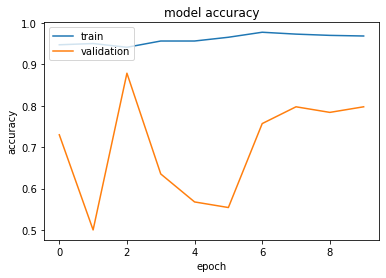

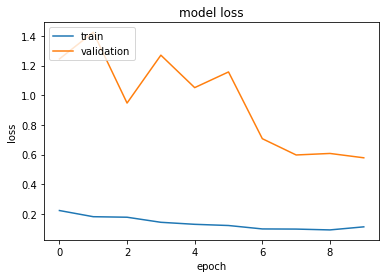

In [18]:
print(hist.history.keys())
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
%%time 

h2 = model.fit(
    trainX, trainY, 
    batch_size=256,
    epochs = 50,
    verbose = 1,
    validation_data = (testX, testY)
)

Epoch 1/50
3/3 [==============================] - 1s 259ms/step - loss: 0.0520 - accuracy: 0.9878 - val_loss: 1.1177 - val_accuracy: 0.6057
Epoch 2/50
3/3 [==============================] - 1s 256ms/step - loss: 0.0549 - accuracy: 0.9878 - val_loss: 1.5630 - val_accuracy: 0.5447
Epoch 3/50
3/3 [==============================] - 1s 258ms/step - loss: 0.0594 - accuracy: 0.9878 - val_loss: 1.6465 - val_accuracy: 0.5122
Epoch 4/50
3/3 [==============================] - 1s 272ms/step - loss: 0.0600 - accuracy: 0.9864 - val_loss: 1.3258 - val_accuracy: 0.5407
Epoch 5/50
3/3 [==============================] - 1s 268ms/step - loss: 0.0509 - accuracy: 0.9878 - val_loss: 0.9062 - val_accuracy: 0.6829
Epoch 6/50
3/3 [==============================] - 1s 271ms/step - loss: 0.0460 - accuracy: 0.9878 - val_loss: 0.6471 - val_accuracy: 0.8089
Epoch 7/50
3/3 [==============================] - 1s 268ms/step - loss: 0.0435 - accuracy: 0.9905 - val_loss: 0.5230 - val_accuracy: 0.8496
Epoch 8/50
3/3 [====

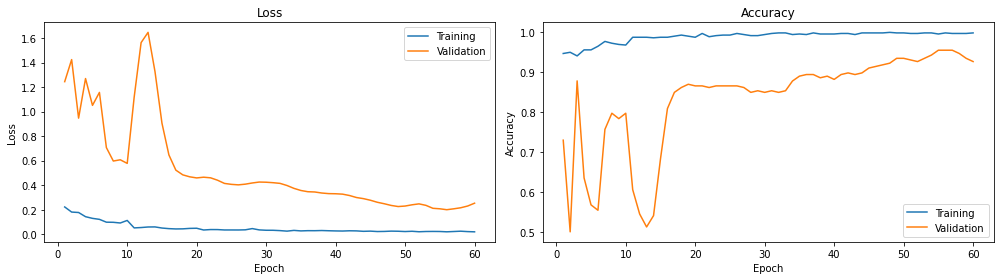

In [20]:
for k in history.keys():
    history[k] += h2.history[k]

epoch_range = range(1, len(history['loss'])+1)

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# model.evaluate(testX, testY)
score = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.2534593641757965
Test accuracy: 0.9268292784690857


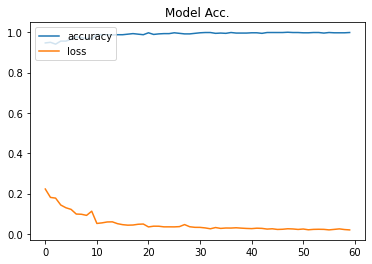

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Model Acc.')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

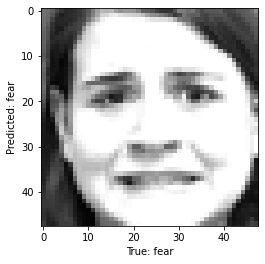

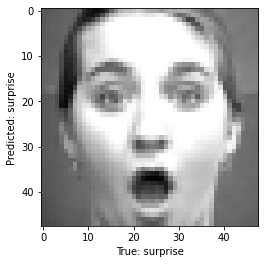

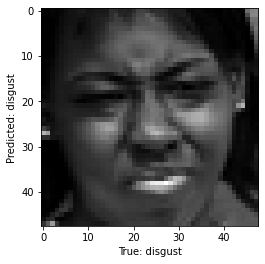

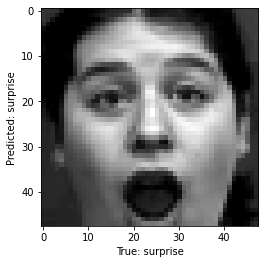

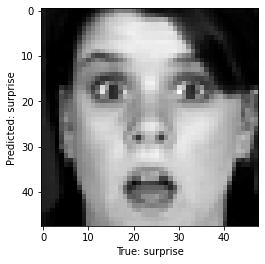

In [23]:
def get_label(k):
    return LABELS[np.argmax(k)]

import random
n = 5
random_indexes = [random.randint(0, testX.shape[0]) for _ in range(n)]
for i in random_indexes:
    prediction = model.predict(np.array([testX[i]]))
    plt.imshow(testX[i], cmap='gray')
    plt.ylabel("Predicted: {}".format(get_label(prediction[0])))
    plt.xlabel("True: {}".format(get_label(testY[i])))
    plt.show()
    
    



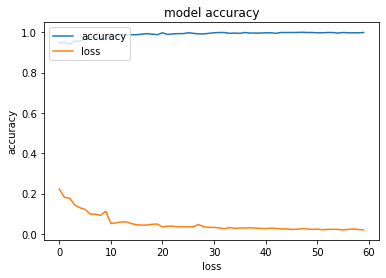

In [24]:
import keras
from matplotlib import pyplot as plt
# history = model.fit(trainX, trainY,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('loss')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

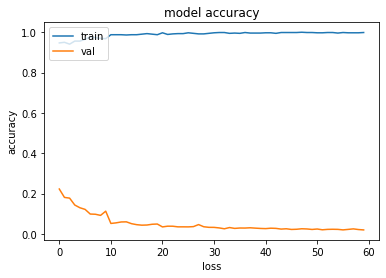

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

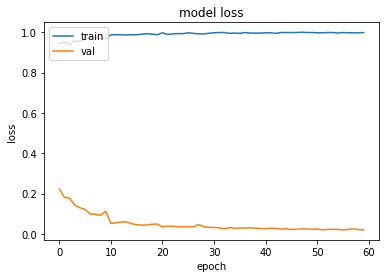

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

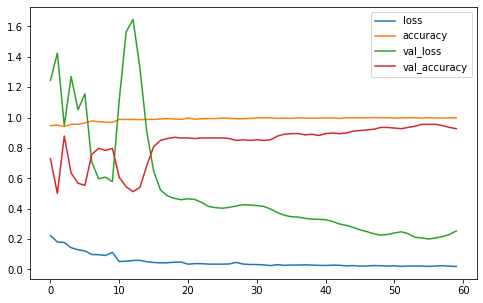

In [27]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

In [28]:
# model.evaluate(testX, testY)
score = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.2534593641757965
Test accuracy: 0.9268292784690857


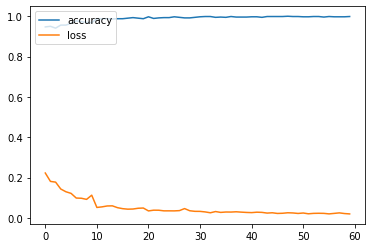

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

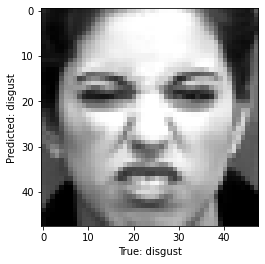

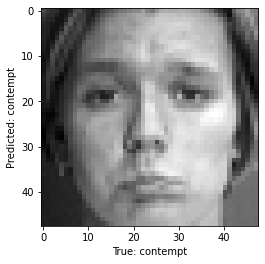

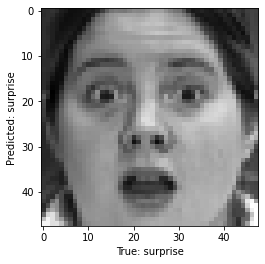

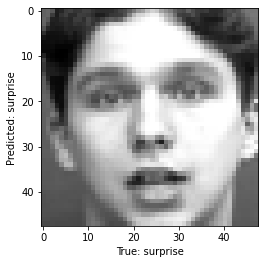

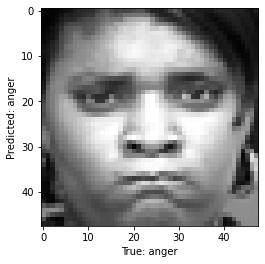

In [30]:
def get_label(k):
    return LABELS[np.argmax(k)]

import random
n = 5
random_indexes = [random.randint(0, testX.shape[0]) for _ in range(n)]
for i in random_indexes:
    prediction = model.predict(np.array([testX[i]]))
    plt.imshow(testX[i], cmap='gray')
    plt.ylabel("Predicted: {}".format(get_label(prediction[0])))
    plt.xlabel("True: {}".format(get_label(testY[i])))
    plt.show()

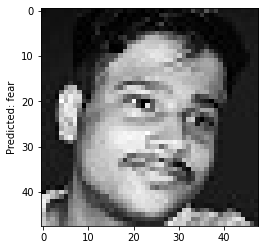

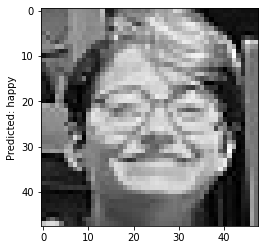

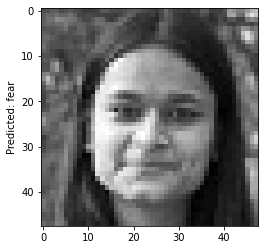

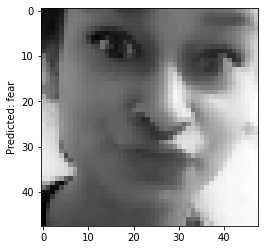

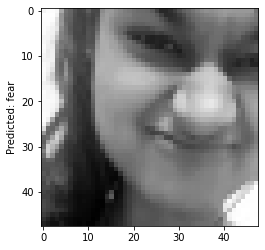

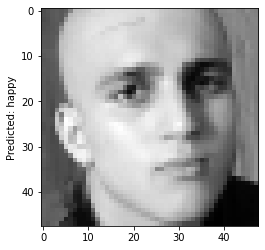

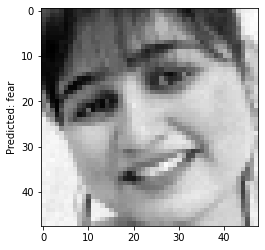

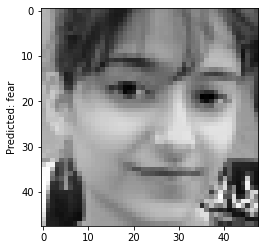

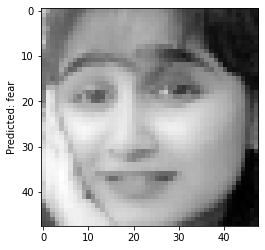

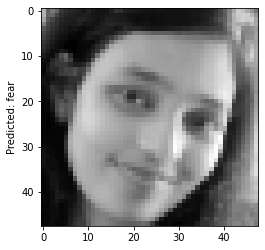

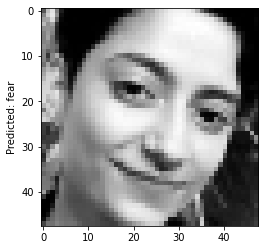

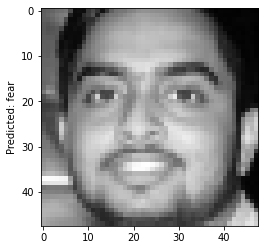

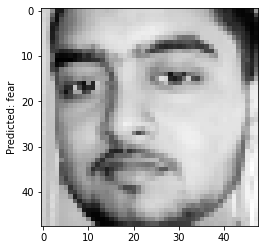

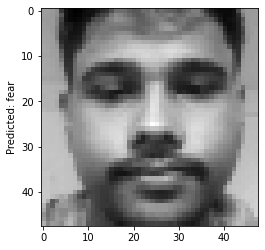

In [33]:
import cv2

for i in os.listdir('images'):
    image = cv2.imread('images/' + i, cv2.IMREAD_GRAYSCALE)
    image = image.reshape(48, 48, 1)
    prediction = model.predict(np.array([image]))
    plt.imshow(image, cmap='gray')
    plt.ylabel("Predicted: {}".format(get_label(prediction)))
    plt.show()
       